# OverView

## In this dataset our main objective is to predict if there is a vehicle in the image or not. There are about 17k images of dimension (64x64x3).

## Two labels:

### 1. Vehicles (8792 items)
### 2. Non-Vehicles (8968 items)

# Importing modules and Loading datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras 
from glob import glob
from keras.models import Sequential
from keras.layers import BatchNormalization,MaxPool2D,Dense,Conv2D,Flatten
from keras.callbacks import EarlyStopping,LearningRateScheduler
import warnings
from tqdm import tqdm
from PIL import Image
from sklearn.model_selection import StratifiedShuffleSplit,train_test_split
warnings.filterwarnings('ignore')

In [ ]:
df = pd.DataFrame(columns=['image','label'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# for a picture containing image of vehicle label is 1.
idx = 0
for name in tqdm(glob('/content/drive/MyDrive/Colab Notebooks/Vehicle Detection/data/vehicles/*')):
    image = Image.open(name)
    img_seq = image.getdata()
    img = np.array(img_seq)
    img = np.reshape(img,(64,64,3))
    data = pd.DataFrame({'image':[img],'label':[1]},index=[idx])
    df = df.append(data)    
    idx+=1

100%|██████████| 8804/8804 [02:36<00:00, 56.37it/s] 


In [ ]:
# for a picture doesn't contain image of vehicle label is 0.
for name in tqdm(glob('/content/drive/MyDrive/Colab Notebooks/Vehicle Detection/data/non-vehicles/*')):
    image = Image.open(name)
    img_seq = image.getdata()
    img = np.array(img_seq)
    img = np.reshape(img,(64,64,3))
    data = pd.DataFrame({'image':[img],'label':[0]},index=[idx]) 
    df = df.append(data)
    idx+=1

100%|██████████| 9006/9006 [02:45<00:00, 54.58it/s] 


# Train test spliting of data

In [ ]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.15,random_state=42)
for train_index,test_index in split.split(df,df['label']):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
# train_x,test_x,train_y,test_y=train_test_split(df['image'],df['label'],random_state=42,test_size=0.15)

In [ ]:
train_img,train_label = train_data['image'],train_data['label']
test_img,test_label = test_data['image'],test_data['label']

# Data Visualization

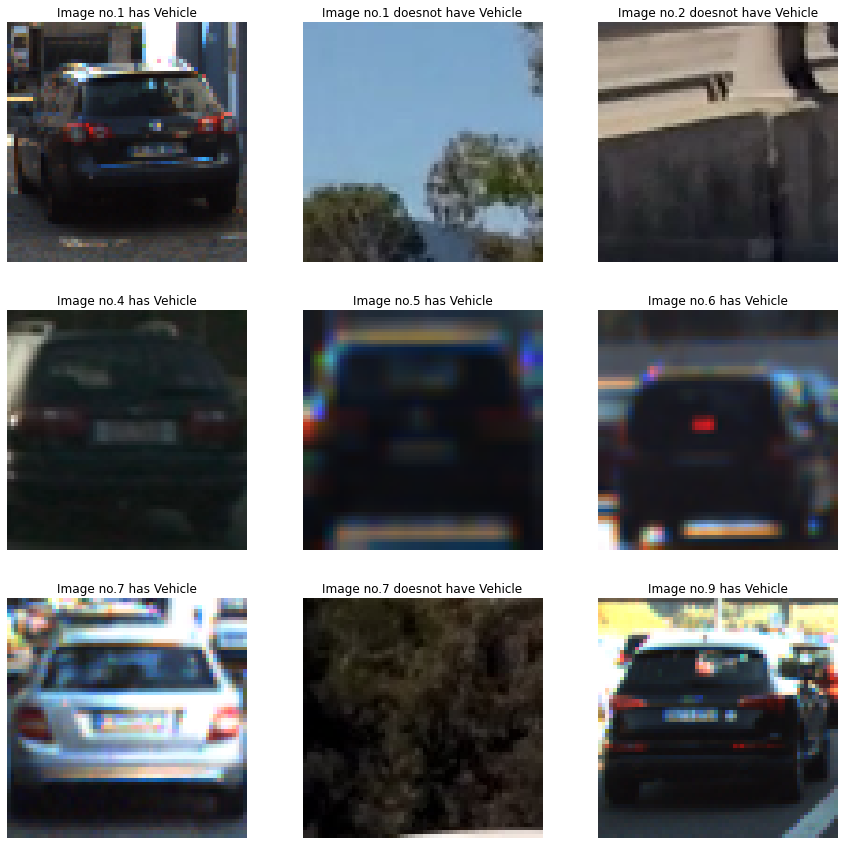

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3,3,(i%9)+1)
    ix = np.random.randint(3000)
    if(train_label.iloc[ix]==1):
        plt.title('Image no.{0} has Vehicle'.format(i+1))
    elif(train_label.iloc[ix]==0):
        plt.title('Image no.{0} doesnot have Vehicle'.format(i))
    plt.axis('off')
    plt.imshow(train_img.iloc[ix])
plt.show()

# Changing Dimension Of Data

In [ ]:
def change_image_dimension(data):
    data = np.reshape(data.to_list(),(len(data),64,64,3))
    return data

In [ ]:
train_img = change_image_dimension(train_img)
test_img = change_image_dimension(test_img)
# train_img
train_img = train_img/255.0
test_img = test_img/255.0

In [ ]:
train_label = np.array(train_label,dtype=int)
test_label = np.array(test_label,dtype=int)

# Callback Functions

In [ ]:
def schedule(epoch,lr):
    if epoch>=5:
        return 0.0001
    return 0.001
early_stop = EarlyStopping(monitor='val_accuracy',patience=3)
learning_rate_scheduler = LearningRateScheduler(schedule)

# Convolutional Neural Network

In [ ]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# Result

In [ ]:
r = model.fit(train_img,train_label,validation_data=(test_img,test_label),epochs=10,batch_size=100,callbacks=[early_stop,learning_rate_scheduler])

Epoch 1/10
152/152 [==============================] - 186s 1s/step - loss: 0.0842 - accuracy: 0.9681 - val_loss: 5.9309 - val_accuracy: 0.5056 - lr: 0.0010
Epoch 2/10
152/152 [==============================] - 185s 1s/step - loss: 0.0239 - accuracy: 0.9915 - val_loss: 5.9068 - val_accuracy: 0.5056 - lr: 0.0010
Epoch 3/10
152/152 [==============================] - 184s 1s/step - loss: 0.0151 - accuracy: 0.9946 - val_loss: 2.2461 - val_accuracy: 0.5932 - lr: 0.0010
Epoch 4/10
152/152 [==============================] - 186s 1s/step - loss: 0.0126 - accuracy: 0.9963 - val_loss: 0.5257 - val_accuracy: 0.8754 - lr: 0.0010
Epoch 5/10
152/152 [==============================] - 180s 1s/step - loss: 0.0142 - accuracy: 0.9946 - val_loss: 0.0442 - val_accuracy: 0.9880 - lr: 0.0010
Epoch 6/10
152/152 [==============================] - 177s 1s/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0145 - val_accuracy: 0.9951 - lr: 1.0000e-04
Epoch 7/10
152/152 [==============================] - 180s 1

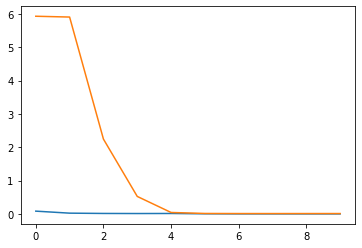

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

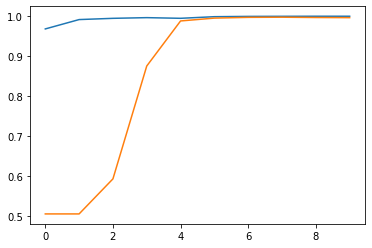

In [ ]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

# Visualization of Predicted Data

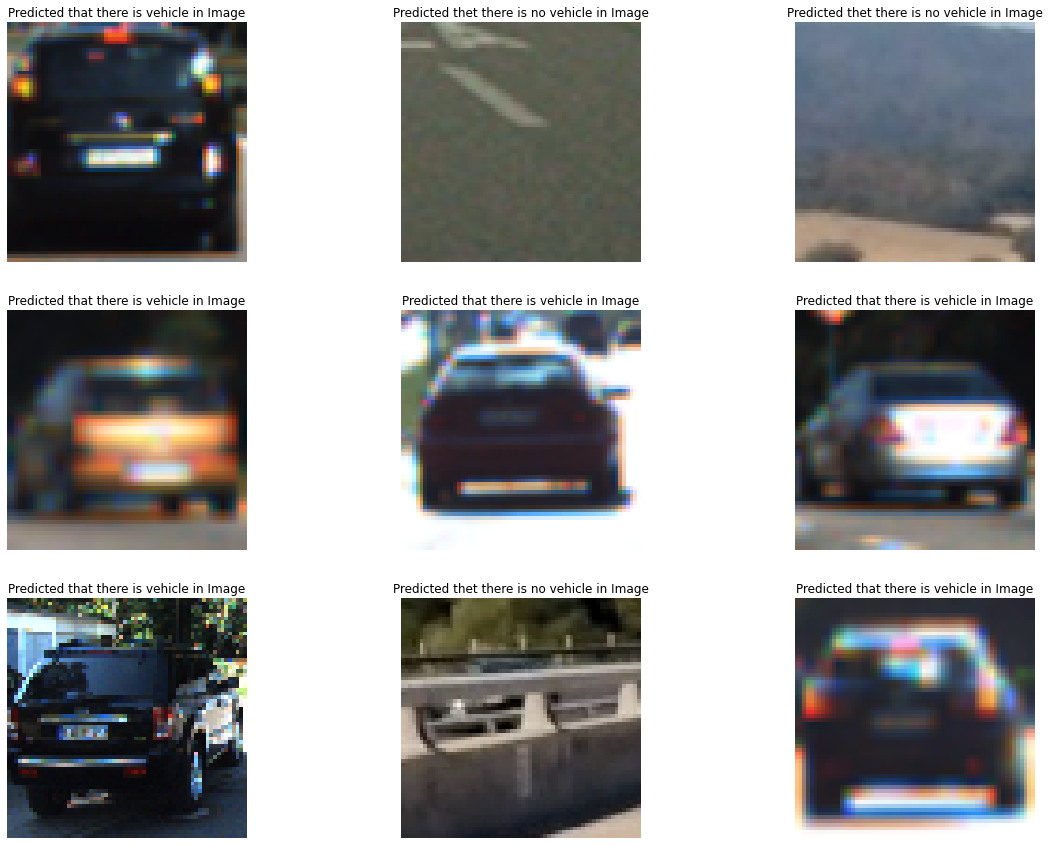

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(3,3,(i%9)+1)
    rd_idx = np.random.randint(700)
    pred_test = model.predict(np.reshape(test_img[rd_idx],(-1,64,64,3)))
    if pred_test==1:
        plt.title('Predicted that there is vehicle in Image')
    else:
        plt.title('Predicted thet there is no vehicle in Image')
    plt.axis('off')
    plt.imshow(test_img[rd_idx])
plt.show()